In [43]:
import warnings
warnings.filterwarnings('ignore')

In [44]:
# 지도 데이터 분석 라이브러리
import fiona
import geopandas

# 데이터 분석 라이브러리
import pandas as pd
import numpy as np
import os

# 데이터 시각화 라이브러리
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.pyplot import style
import seaborn as sns
import folium
from folium.plugins import HeatMap

# 머신러닝 라이브러리
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import ensemble
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import make_scorer

In [45]:
# matplotlib 한글 지원 폰트 설정
plt.rc("font", family="Malgun Gothic")

In [48]:
gdf = geopandas.read_file('./dataset/전처리후/merge_7.geojson', encoding='utf-8')
gdf = gdf[['geometry', '인구수', '건축물수', '주거용도면적', '건축물높이', '건축물연면적', '주차장수', '주유소', '주차구획수', '교통량', '교육연구시설', '주거지', '농축산업시설', '창고시설',
       '편의시설', '생산시설', '님비시설', '자동차관련시설', 'EV']]

gdf.head()

,geometry,인구수,건축물수,주거용도면적,건축물높이,건축물연면적,주차장수,주유소,주차구획수,교통량,교육연구시설,주거지,농축산업시설,창고시설,편의시설,생산시설,님비시설,자동차관련시설,EV
0,"POLYGON ((977800.00000 1828600.00000, 977800.0...",0,1,83.64,0.00,83.64,0,0,0,0.0,0,0,0,0,0,0,0,0,0
1,"POLYGON ((990100.00000 1837300.00000, 990100.0...",0,1,208.91,7.80,198.71,0,0,0,0.0,0,0,0,0,0,0,0,0,0
2,"POLYGON ((980600.00000 1843000.00000, 980600.0...",27,4,99.70,6.43,99.25,0,0,0,0.0,0,0,0,0,0,0,0,0,0
3,"POLYGON ((983800.00000 1830600.00000, 983800.0...",0,3,123.00,5.37,277.76,0,0,0,0.0,0,0,0,0,0,0,0,0,0
4,"POLYGON ((969300.00000 1857700.00000, 969300.0...",27,20,77.54,8.25,123.95,0,0,0,0.0,0,0,0,0,0,0,0,0,0


### 정규화

In [49]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
gdf_minmax = scaler.fit_transform(gdf[['인구수', '건축물수', '주거용도면적', '건축물높이', '건축물연면적']])

gdf_minmax = pd.DataFrame(gdf_minmax, columns=['인구수', '건축물수', '주거용도면적', '건축물높이', '건축물연면적'])

gdf[['인구수', '건축물수', '주거용도면적', '건축물높이', '건축물연면적']] = gdf_minmax

gdf.head()

,geometry,인구수,건축물수,주거용도면적,건축물높이,건축물연면적,주차장수,주유소,주차구획수,교통량,교육연구시설,주거지,농축산업시설,창고시설,편의시설,생산시설,님비시설,자동차관련시설,EV
0,"POLYGON ((977800.00000 1828600.00000, 977800.0...",0.00000,0.014706,0.090746,0.000000,0.000854,0,0,0,0.0,0,0,0,0,0,0,0,0,0
1,"POLYGON ((990100.00000 1837300.00000, 990100.0...",0.00000,0.014706,0.226660,0.064580,0.002029,0,0,0,0.0,0,0,0,0,0,0,0,0,0
2,"POLYGON ((980600.00000 1843000.00000, 980600.0...",0.01176,0.058824,0.108171,0.053237,0.001014,0,0,0,0.0,0,0,0,0,0,0,0,0,0
3,"POLYGON ((983800.00000 1830600.00000, 983800.0...",0.00000,0.044118,0.133451,0.044461,0.002836,0,0,0,0.0,0,0,0,0,0,0,0,0,0
4,"POLYGON ((969300.00000 1857700.00000, 969300.0...",0.01176,0.294118,0.084128,0.068306,0.001266,0,0,0,0.0,0,0,0,0,0,0,0,0,0


In [ ]:
gdf = gdf[['geometry', '인구수', '건축물수', '주거용도면적', '건축물높이', '건축물연면적', '주차장수', '주유소', '주차구획수', '교통량', '교육연구시설', '주거지', '농축산업시설', '창고시설',
       '편의시설', '생산시설', '님비시설', '자동차관련시설', 'EV']]

### data / target 분리

In [50]:
data = gdf[gdf.columns[1:-1]]
data.head()

,인구수,건축물수,주거용도면적,건축물높이,건축물연면적,주차장수,주유소,주차구획수,교통량,교육연구시설,주거지,농축산업시설,창고시설,편의시설,생산시설,님비시설,자동차관련시설
0,0.00000,0.014706,0.090746,0.000000,0.000854,0,0,0,0.0,0,0,0,0,0,0,0,0
1,0.00000,0.014706,0.226660,0.064580,0.002029,0,0,0,0.0,0,0,0,0,0,0,0,0
2,0.01176,0.058824,0.108171,0.053237,0.001014,0,0,0,0.0,0,0,0,0,0,0,0,0
3,0.00000,0.044118,0.133451,0.044461,0.002836,0,0,0,0.0,0,0,0,0,0,0,0,0
4,0.01176,0.294118,0.084128,0.068306,0.001266,0,0,0,0.0,0,0,0,0,0,0,0,0


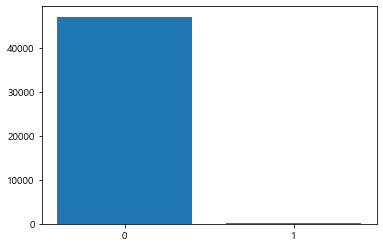

0    0.994177
1    0.005823
Name: EV, dtype: float64


In [51]:
target = gdf[gdf.columns[-1]]

plt.bar(target.unique(), target.value_counts())
plt.xticks([0, 1])
plt.show()
print(target.value_counts()/len(target))

### 모델 비교

### RandomForest (FBeta Scoring)

#### precision에 지나치게 유리하기때문

In [140]:
fbeta = make_scorer(fbeta_score, beta=5) # 쓰지마라?

dists = {
    'max_depth' : [3,5,10,15,20,30,50,100],
    'max_features' : [3,5,7,9,11,14,17], # feature를 1개만 활용하는 경우가 있음. 
    'n_estimators' : [10,20,30,50],
    'class_weight' : [{0:1.3, 1:8.7}] # 편향이 심할수록 극단적인 결과가 나옴
}

clf = RandomizedSearchCV(
    ensemble.RandomForestClassifier(),
    param_distributions=dists, # 파라미터 입력
    n_iter = 100,   # random search 탐색 횟수
    scoring=fbeta,  # 오차 평가방법
    verbose=1,     # 진행상황
    n_jobs = 4
  )

clf.fit(data, target)

print('best_params :', clf.best_params_)
print('best_score :', clf.best_score_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
best_params : {'n_estimators': 10, 'max_features': 3, 'max_depth': 3, 'class_weight': {0: 1.3, 1: 8.7}}
best_score : 0.09098011681414711


In [141]:
#### 가중치에 따라 최적 입지 후보군이 수천~수십개까지 바뀌는데, TP도 변동이 심하며, 과반을 넘기 어려움
#### 아무래도 성장 중인 신도시인 세종시의 특성상, 과거 기준으로 지어진 충전소가 학습에 방해되는 듯함
#### 최소한 모델이 다양한 피쳐를 활용하여 선정한만큼,
#### 신뢰성은 있으며 적은 수의 최적입지후보를 선정한 모델의 성능이 더 높다고 가정하는 것이 좋을 듯 함

#### 우선 순위 개수를 정해서 그를 기준으로 모델링을 할 것!
#### 과거 기준으로 선정된 입지일 수 있으므로, 현재 기준에선 이게 맞을지도

In [143]:
pred = clf.predict(data)

temp = gdf.copy()
temp['pred'] = pred

print('실제 충전소 수 :', len(target[target==1]))
print('충전소가 있어야 한다고 분류한 타일 수 :', len(temp[temp['pred']==1]))
print('recall score(True Positive) 실제 충전소가 맞는 지 맞춘 경우 :', len(temp[(temp['pred']==1) & (temp['EV']==1)]), '/', len(target[target==1]))
print('최적 입지 후보 :', len(temp[(temp['pred']==1) & (temp['EV']==0)]), '/', len(temp[temp['EV']==0]))

실제 충전소 수 : 276
충전소가 있어야 한다고 분류한 타일 수 : 61
recall score(True Positive) 실제 충전소가 맞는 지 맞춘 경우 : 24 / 276
최적 입지 후보 : 37 / 47120


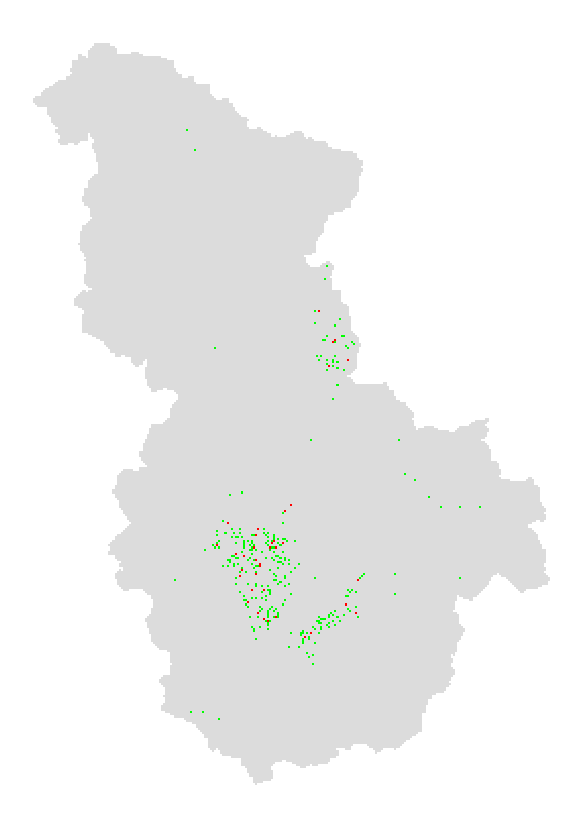

In [144]:
idx = temp[(temp['EV'] == 0) & (temp['pred'] == 1)].index
for i in temp[temp['pred'] == 1].index:
    temp['pred'].loc[i] = 0
for i in idx:
    temp['pred'].loc[i] = 1

fig, ax1 = plt.subplots(figsize=(15, 15))
fig.set_facecolor('white') ## 캔버스 색상 설정

gdf['geometry'].plot(ax=ax1, color='gainsboro')
gdf[gdf['EV']==1].plot(ax=ax1, column='EV', color='lime', aspect=1)
temp[temp['pred']==1].plot(ax=ax1, column='pred', color='red', aspect=1)
ax1.set_axis_off()
plt.show()

In [146]:
geometry = temp.geometry.copy().astype('string')

#### 격자 중심점의 위도/경도 찾기

#### polygon 데이터를 슬라이싱하기 위해 string으로 변환
polygon = temp['geometry'].astype('string')

loc = []

# 한 격자당 위도 변화
length_100m = (36.73376199366808 - 36.40675835257603) / 364

# 한 격자당 경도 변화
width_100m = (127.4092754044858 - 127.12765872447403) / 254

for i, P in enumerate(polygon):
    lat = (int(P.split()[2][:-1]) + 50 - 1823200) / 100 * length_100m + 36.40675835257603
    long = (int(P.split()[1][2:]) + 50 - 966700) / 100 * width_100m + 127.12765872447403
    
    loc.append((lat, long))

#### 중심점을 GCS 열로 생성

temp['GCS'] = loc
temp[temp['pred']==1]

,geometry,인구수,건축물수,주거용도면적,건축물높이,건축물연면적,주차장수,주유소,주차구획수,교통량,...,주거지,농축산업시설,창고시설,편의시설,생산시설,님비시설,자동차관련시설,EV,pred,GCS
62,"POLYGON ((981500.00000 1845000.00000, 981500.0...",0.323171,0.073529,0.0,0.320666,0.072340,0,0,0,0.0,...,0,0,0,0,0,0,0,0,1,"(36.60305037339639, 127.29230469684312)"
96,"POLYGON ((982100.00000 1844000.00000, 982100.0...",0.229965,0.102941,0.0,0.232489,0.039475,0,0,0,0.0,...,0,0,0,0,0,0,0,0,1,"(36.594066756882874, 127.29895705936308)"
126,"POLYGON ((978900.00000 1835000.00000, 978900.0...",0.324042,0.029412,0.0,0.731495,0.136945,0,0,0,0.0,...,0,0,0,0,0,0,0,0,1,"(36.51321420826122, 127.26347779258994)"
674,"POLYGON ((976900.00000 1833700.00000, 976900.0...",0.331446,0.044118,0.0,0.511509,0.111900,0,0,0,0.0,...,0,0,0,0,0,0,0,0,1,"(36.501535506793644, 127.24130325085673)"
1041,"POLYGON ((978000.00000 1832700.00000, 978000.0...",0.195993,0.147059,0.0,0.187779,0.036581,0,0,0,0.0,...,0,0,0,0,0,0,0,0,1,"(36.492551890280126, 127.25349924881)"
1427,"POLYGON ((976200.00000 1836000.00000, 976200.0...",0.268293,0.235294,0.0,0.168654,0.038804,0,0,0,0.0,...,0,0,0,0,0,0,0,0,1,"(36.522197824774736, 127.23354216125011)"
2119,"POLYGON ((981400.00000 1844900.00000, 981400.0...",0.317944,0.044118,0.0,0.486587,0.095454,2,0,16,0.0,...,0,0,0,0,0,0,0,0,1,"(36.60215201174504, 127.29119596975646)"
2189,"POLYGON ((977400.00000 1832700.00000, 977400.0...",0.342770,0.338235,0.0,0.219573,0.036527,0,0,0,0.0,...,0,0,0,0,0,0,0,0,1,"(36.492551890280126, 127.24684688629003)"
2320,"POLYGON ((979300.00000 1836900.00000, 979300.0...",0.304007,0.044118,0.0,0.551995,0.090390,0,0,0,0.0,...,0,0,0,0,0,0,0,0,1,"(36.5302830796369, 127.26791270093658)"
2576,"POLYGON ((980700.00000 1846400.00000, 980700.0...",0.370645,0.044118,0.0,0.479218,0.143970,0,0,0,0.0,...,0,0,0,0,0,0,0,0,1,"(36.61562743651532, 127.28343488014983)"


,geometry,인구수,건축물수,주거용도면적,건축물높이,건축물연면적,주차장수,주유소,주차구획수,교통량,교육연구시설,주거지,농축산업시설,창고시설,편의시설,생산시설,님비시설,자동차관련시설,EV,pred
62,"POLYGON ((981500.00000 1845000.00000, 981500.0...",0.323171,0.073529,0.0,0.320666,0.072340,0,0,0,0.0,0,0,0,0,0,0,0,0,0,1
96,"POLYGON ((982100.00000 1844000.00000, 982100.0...",0.229965,0.102941,0.0,0.232489,0.039475,0,0,0,0.0,0,0,0,0,0,0,0,0,0,1
126,"POLYGON ((978900.00000 1835000.00000, 978900.0...",0.324042,0.029412,0.0,0.731495,0.136945,0,0,0,0.0,0,0,0,0,0,0,0,0,0,1
674,"POLYGON ((976900.00000 1833700.00000, 976900.0...",0.331446,0.044118,0.0,0.511509,0.111900,0,0,0,0.0,0,0,0,0,0,0,0,0,0,1
1041,"POLYGON ((978000.00000 1832700.00000, 978000.0...",0.195993,0.147059,0.0,0.187779,0.036581,0,0,0,0.0,0,0,0,0,0,0,0,0,0,1
1427,"POLYGON ((976200.00000 1836000.00000, 976200.0...",0.268293,0.235294,0.0,0.168654,0.038804,0,0,0,0.0,0,0,0,0,0,0,0,0,0,1
2119,"POLYGON ((981400.00000 1844900.00000, 981400.0...",0.317944,0.044118,0.0,0.486587,0.095454,2,0,16,0.0,0,0,0,0,0,0,0,0,0,1
2189,"POLYGON ((977400.00000 1832700.00000, 977400.0...",0.342770,0.338235,0.0,0.219573,0.036527,0,0,0,0.0,0,0,0,0,0,0,0,0,0,1
2320,"POLYGON ((979300.00000 1836900.00000, 979300.0...",0.304007,0.044118,0.0,0.551995,0.090390,0,0,0,0.0,0,0,0,0,0,0,0,0,0,1
2576,"POLYGON ((980700.00000 1846400.00000, 980700.0...",0.370645,0.044118,0.0,0.479218,0.143970,0,0,0,0.0,0,0,0,0,0,0,0,0,0,1


In [ ]:
numNeighbors = list(range(1, 30))

trainF1 = []
testF1 = []
for k in numNeighbors:
    clf = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
    clf.fit(data_train, target_train)
    Y_predTrain = clf.predict(data_train)
    Y_predTest = clf.predict(data_test)
    trainF1.append(f1_score(target_train, Y_predTrain, average='micro'))
    testF1.append(f1_score(target_test, Y_predTest, average='micro'))
plt.figure(figsize=(15, 6))
plt.plot(numNeighbors, trainF1, 'ro-', numNeighbors, testF1, 'bv--')
plt.legend(['Train F1', 'Test F1'])
plt.xlabel('Number of neighbors')
plt.ylabel('F1 score')
plt.show()
print("best testF1 :", max(testF1))

In [ ]:
num_depth = list(range(1, 30))

trainF1 = []
testF1 = []
for k in numNeighbors:
    clf = DecisionTreeClassifier(max_depth=k)
    clf.fit(data_train, target_train)
    Y_predTrain = clf.predict(data_train)
    Y_predTest = clf.predict(data_test)
    trainF1.append(f1_score(target_train, Y_predTrain, average='micro'))
    testF1.append(f1_score(target_test, Y_predTest, average='micro'))
plt.figure(figsize=(15, 6))
plt.plot(numNeighbors, trainF1, 'ro-', numNeighbors, testF1, 'bv--')
plt.legend(['Train F1', 'Test F1'])
plt.xlabel('Number of Max_depth')
plt.ylabel('F1 score')
plt.show()
print("best testF1 :", max(testF1))

In [ ]:
xgb, light gbm